In [1]:
pwd()  # cd() into this repo

"/groups/scicompsoft/home/arthurb/projects/darshan/ArthurKimChenPreibischDarshan2023"

In [2]:
]activate .

  Activating project at `~/projects/darshan/ArthurKimChenPreibischDarshan2023`


In [3]:
using TrainSpikingNet

In [4]:
model_folder = "neuropixel-left-N66002-K0-L64"

"neuropixel-left-N66002-K0-L64"

In [5]:
param(model_folder);

In [6]:
config(model_folder, :cpu);

LBTConfig([ILP64] libmkl_rt.so, [LP64] libmkl_rt.so)


In [7]:
init(spikerate_file="PSTH-smoothed-left.jld2");

mean excitatory firing rate: 5.875632556589195 Hz
mean inhibitory firing rate: 5.88854883185358 Hz


In [8]:
config(model_folder, :gpu);

In [9]:
train(nloops=100, correlation_interval=5);

loop #  task #  elapsed time (s)  firing rate (Hz)  correlation
     1       1           15.3180           7.36446  
     2       1           4.42589           7.54268  
     3       1           4.39503           7.59662  
     4       1           4.38623           7.60644  
     5       1           14.9968           7.63899    0.0619716 (5 are NaN)
     6       1           4.40882           7.62262  
     7       1           4.40425           7.63031  
     8       1           4.41332           7.64263  
     9       1           4.39773           7.62310  
    10       1           10.9253           7.64920     0.133821 (5 are NaN)
    11       1           4.39190           7.66696  
    12       1           4.39080           7.57673  
    13       1           4.39932           7.56744  
    14       1           4.39637           7.63864  
    15       1           11.0666           7.68438     0.212708 (5 are NaN)
    16       1           4.39305           7.57973  
    17       1     

In [10]:
using JLD2

In [11]:
curves = load(joinpath(model_folder, "learning-curve.jld2"))

Dict{String, Any} with 3 entries:
  "correlation"  => Union{Missing, Float64}[missing, missing, missing, missing,…
  "elapsed_time" => [15.318, 4.42589, 4.39503, 4.38623, 14.9968, 4.40882, 4.404…
  "firing_rate"  => [7.36446, 7.54268, 7.59662, 7.60644, 7.63899, 7.62262, 7.63…

In [12]:
using CairoMakie

In [13]:
ipresent = findall(!ismissing(x) for x in curves["correlation"]);   # omit loops that correlation wasn't measured

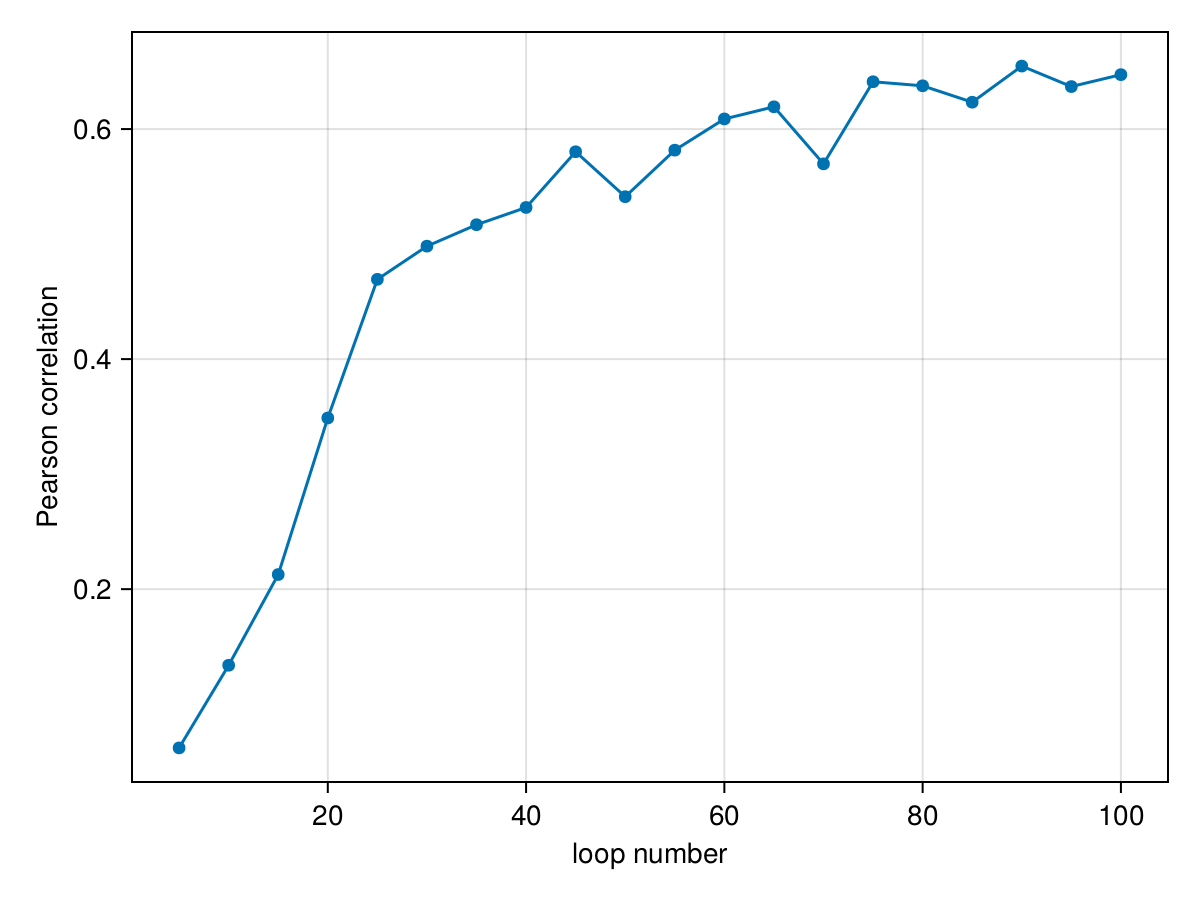

In [14]:
fig, ax, _ = scatterlines(ipresent, curves["correlation"][ipresent])
ax.xlabel = "loop number"
ax.ylabel = "Pearson correlation"
fig

In [15]:
p = load(joinpath(model_folder, "param.jld2"), "param");
data = load("PSTH-smoothed-left.jld2") |> values |> first    # Ntime x Nneurons

150×66002 Matrix{Float64}:
 0.5625    1.3125   0.0        8.1875   …  6.38112  27.5787   0.480769
 0.611111  1.44444  0.0        8.16667     6.21601  28.1274   0.42735
 0.55      1.4      0.0        8.1         6.18881  28.6364   0.384615
 0.545455  1.27273  0.0        7.86364     6.23013  29.6885   0.381437
 0.5       1.20833  0.0        7.91667     6.03147  30.3322   0.34965
 0.5       1.23077  0.0384615  8.03846  …  5.83647  30.581    0.322754
 0.5       1.28571  0.0357143  8.25        5.71928  30.8691   0.324675
 0.566667  1.3      0.0333333  8.33333     5.64103  30.7459   0.32634
 0.6       1.26667  0.0333333  8.23333     5.61772  30.7925   0.37296
 0.6       1.23333  0.0333333  8.43333     5.36131  31.0956   0.39627
 0.6       1.26667  0.0333333  8.4      …  5.36131  31.0956   0.41958
 0.6       1.23333  0.0333333  8.33333     5.29138  31.3054   0.32634
 0.7       1.23333  0.0333333  8.2         5.36131  31.4685   0.32634
 ⋮                                      ⋱            ⋮    

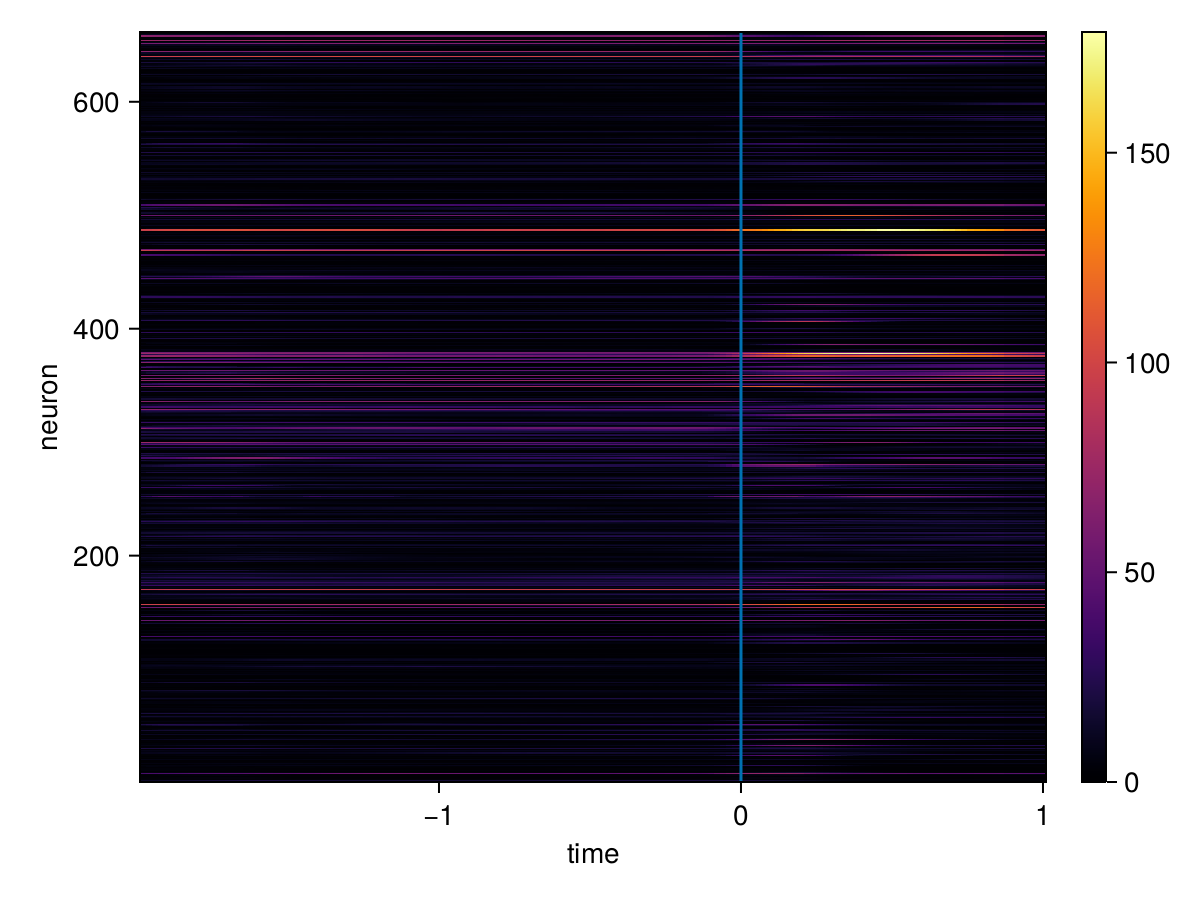

In [16]:
dv = @view data[:,1:100:end]   # only plot every 100th neuron
x = p.learn_every/1000 : p.learn_every/1000 : p.train_time/1000-1
y = 1:size(dv,2)
fig, ax, hm = heatmap(x.-2, y, dv, colormap=:inferno)
Colorbar(fig[1,2], hm)
lines!(ax, [0,0], [extrema(y)...])
ax.xlabel = "time"
ax.ylabel = "neuron"
fig

In [17]:
test(ntrials=200, ineurons_to_test=1:64);

using checkpoint 150
trial #1, task #1: 10.9 sec
trial #2, task #1: 8.03 sec
trial #3, task #1: 8.03 sec
trial #4, task #1: 8.06 sec
trial #5, task #1: 8.04 sec
trial #6, task #1: 8.03 sec
trial #7, task #1: 8.05 sec
trial #8, task #1: 8.1 sec
trial #9, task #1: 8.0 sec
trial #10, task #1: 7.97 sec
trial #11, task #1: 8.02 sec
trial #12, task #1: 7.96 sec
trial #13, task #1: 7.96 sec
trial #14, task #1: 8.02 sec
trial #15, task #1: 7.93 sec
trial #16, task #1: 7.92 sec
trial #17, task #1: 7.97 sec
trial #18, task #1: 7.93 sec
trial #19, task #1: 7.95 sec
trial #20, task #1: 7.92 sec
trial #21, task #1: 7.96 sec
trial #22, task #1: 7.9 sec
trial #23, task #1: 7.9 sec
trial #24, task #1: 8.01 sec
trial #25, task #1: 7.82 sec
trial #26, task #1: 7.77 sec
trial #27, task #1: 7.8 sec
trial #28, task #1: 7.81 sec
trial #29, task #1: 7.77 sec
trial #30, task #1: 7.79 sec
trial #31, task #1: 7.86 sec
trial #32, task #1: 7.82 sec
trial #33, task #1: 7.79 sec
trial #34, task #1: 7.83 sec
trial #

In [18]:
model = load(joinpath(model_folder, "test.jld2"))

Dict{String, Any} with 4 entries:
  "ineurons_to_test" => 1:64
  "init_code"        => :(())
  "utotal"           => Any[Float32[-0.589742 -0.259798 … 0.567784 -0.329303; -…
  "times"            => Any[Vector{UInt16}[[0x203d, 0x2138, 0x3f78, 0x4f93, 0x5…

In [19]:
using StatsBase

In [20]:
ineuron, itrial, itask = 1, 1, 1
nneurons = length(model["times"][itrial,itask])
t = p.stim_off : p.learn_every : p.train_time
psths = Matrix{Float64}(undef, nneurons, length(t)-1)
for i = 1:nneurons
    times_ineuron = vcat([x[ineuron] for x in model["times"][:,itask]]...)  # spike times for one neuron across all trials
    psth = fit(Histogram, times_ineuron, t)
    psths[i,:] .= psth.weights
end

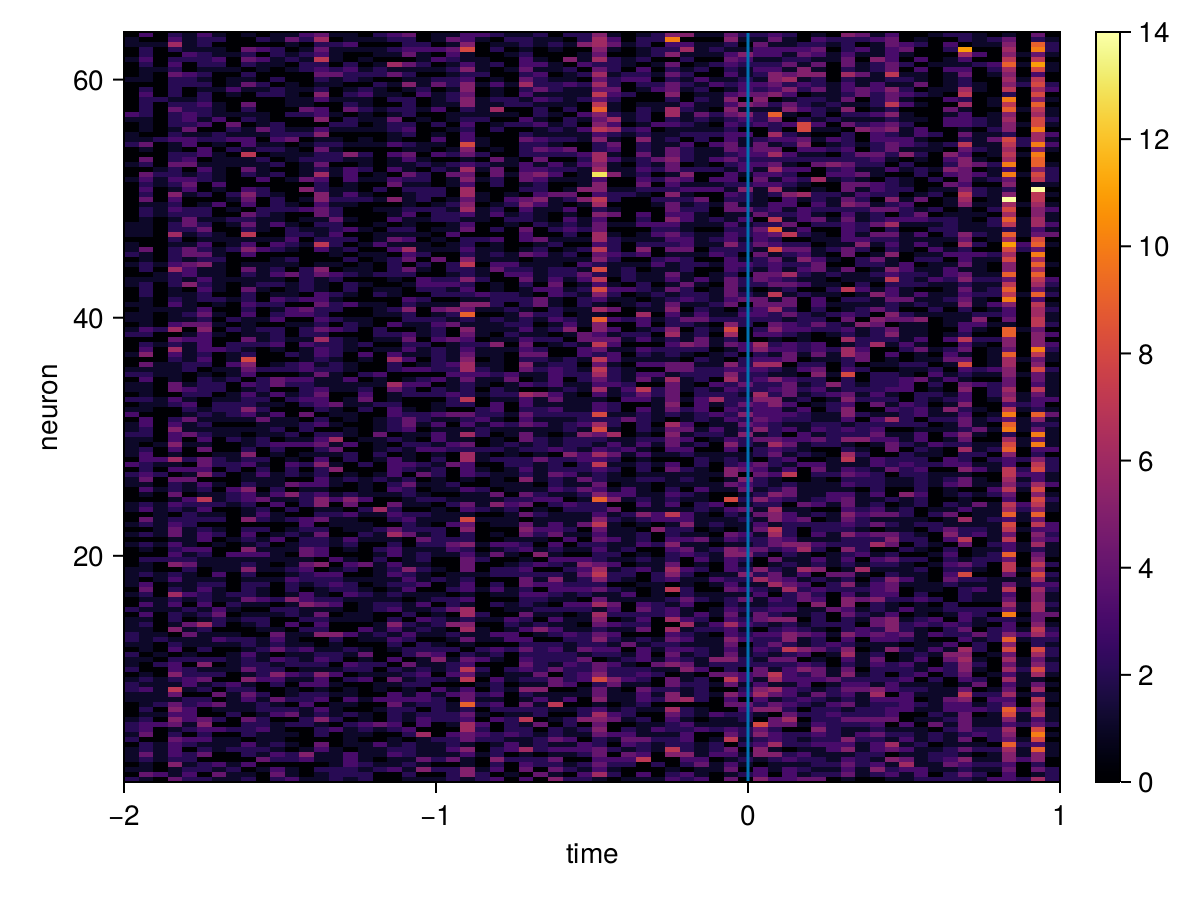

In [21]:
fig, ax, hm = heatmap(t / 1000 .- 3, 1:nneurons, psths, colormap=:inferno)
Colorbar(fig[1,2], hm)
lines!(ax, [0,0], [1,nneurons])
ax.xlabel = "time"
ax.ylabel = "neuron"
fig

In [22]:
# spike times for the first 64 neurons during the first trial and only task
times_trial1 = model["times"][itrial,itask]

64-element Vector{Vector{UInt16}}:
 [0x203d, 0x2138, 0x3f78, 0x4f93, 0x5cfc, 0x8a7c]
 [0x0206, 0x0a55, 0x0ac2, 0x1461, 0x1835, 0x1fd5, 0x20ba, 0x2172, 0x2193, 0x2381, 0x2842, 0x2896, 0x744e, 0x7783, 0x7857, 0x80d5]
 [0x1073, 0x2119, 0x56f0, 0x9b9f]
 [0x121d, 0x1e35, 0x245e, 0x2495, 0x2516, 0x255d, 0x26e8, 0x2dd0, 0x357e, 0x3a89  …  0x62dc, 0x6409, 0x66f6, 0x6c92, 0x7102, 0x77ac, 0x814a, 0x828e, 0x86f0, 0x9770]
 [0x0001, 0x018d, 0x0f3b, 0x1274, 0x24d2, 0x2559, 0x2861, 0x3a00, 0x3f8f, 0x44bb  …  0x6ab1, 0x6f24, 0x73ed, 0x747f, 0x75d5, 0x7b59, 0x7d60, 0x8eca, 0x941a, 0x973c]
 [0x10cd, 0x12c9, 0x1742, 0x1827, 0x1988, 0x1ff1, 0x29f4, 0x42f0, 0x472b, 0x57f6, 0x5b5b, 0x6f99, 0x73b4, 0x79b7, 0x8694, 0x8d3f, 0x8ffe, 0x9880]
 [0x0a2a, 0x12bc, 0x1837, 0x2947, 0x3020, 0x5807, 0x72d6, 0x7430]
 [0x21c8, 0x2307, 0x585c, 0x6f87, 0x70e8, 0x7432, 0x8803, 0x927a]
 [0x0026, 0x09b6, 0x110d, 0x14bc, 0x2023, 0x39de, 0x3ed6, 0x4496, 0x4594, 0x4c20, 0x881f, 0x9117, 0x9904]
 [0x0243, 0x02e2, 0x0388, 0x0503, 0x1

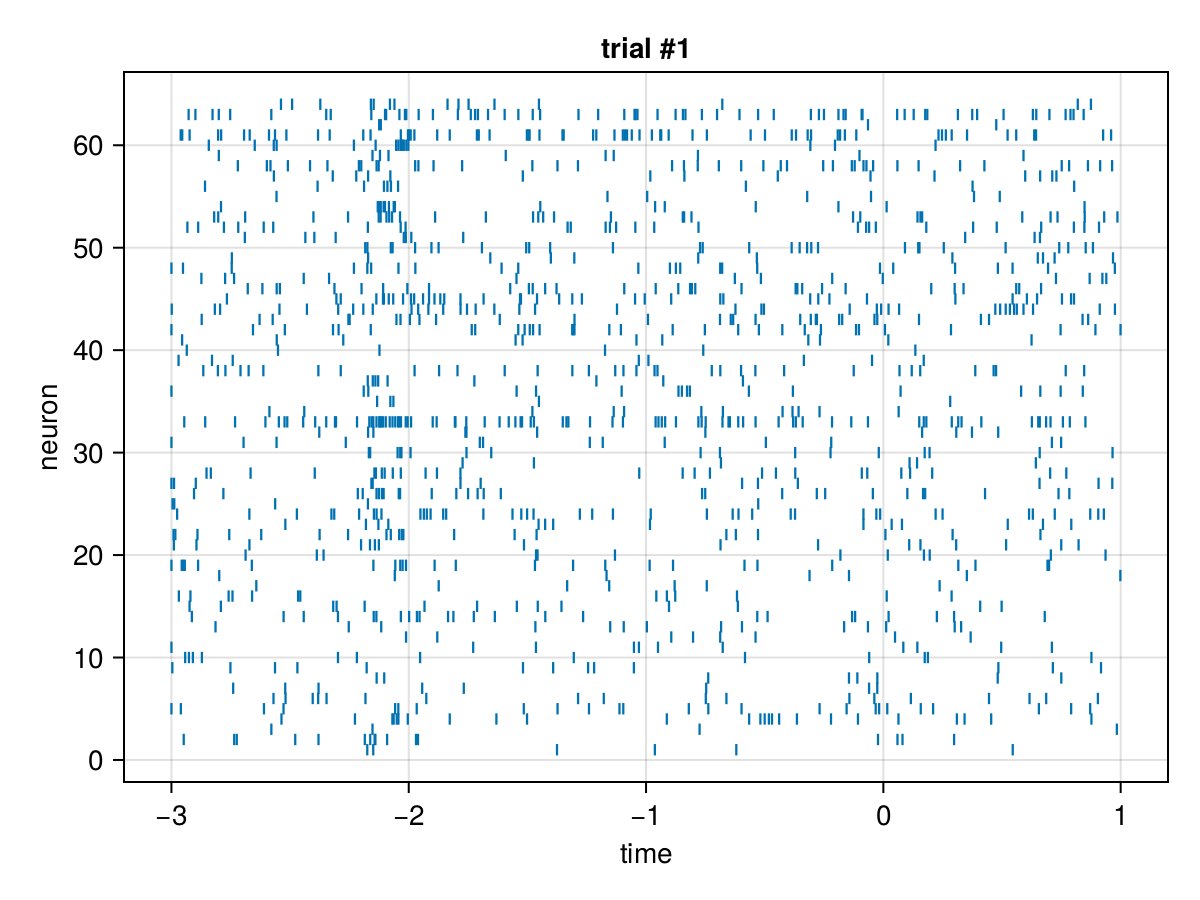

In [23]:
x = vcat(times_trial1...) * p.dt / 1000
y = vcat([fill(i,length(x)) for (i,x) in enumerate(times_trial1)]...)
fig, ax, pts = scatter(x .- 3, y, marker=:vline)
ax.xlabel = "time"
ax.ylabel = "neuron"
ax.title = string("trial #", itrial)
fig

In [24]:
ulearned = model["utotal"]  # a matrix for each trial...

200×1 Matrix{Any}:
 Float32[-0.5897415 -0.25979772 … 0.5677845 -0.32930297; -0.5833527 -0.25569293 … 0.5593714 -0.3169129; … ; -0.36853427 -0.110218294 … 0.31768182 -0.15000552; -0.37302297 -0.10378683 … 0.31318012 -0.1461361]
 Float32[-0.55117613 -0.25544193 … 0.5198452 -0.30473047; -0.5487532 -0.25315762 … 0.51324403 -0.29995984; … ; -0.3231422 -0.12644874 … 0.37174332 -0.13980177; -0.32069793 -0.1249961 … 0.36335418 -0.14752728]
 Float32[-0.46362662 -0.23491298 … 0.4920609 -0.2917254; -0.45808578 -0.23341456 … 0.48905453 -0.28302985; … ; -0.30783173 -0.10819647 … 0.30360132 -0.21927148; -0.30567452 -0.10796346 … 0.3046042 -0.21777265]
 Float32[-0.49488157 -0.26451486 … 0.5752215 -0.22311583; -0.4911862 -0.25544742 … 0.5550241 -0.20963864; … ; -0.33367676 -0.12963967 … 0.30408546 -0.25544018; -0.33357963 -0.12844203 … 0.31154224 -0.25497952]
 Float32[-0.58004 -0.2926943 … 0.53237265 -0.19696812; -0.5705078 -0.29093266 … 0.5236867 -0.18874706; … ; -0.33344814 -0.114424855 … 0.36817676

In [25]:
ulearned[itrial]   # ...of Ntime x Nneuron matrices

150×64 Matrix{Float32}:
 -0.589742  -0.259798  -0.83194   …  -0.82041   0.567784  -0.329303
 -0.583353  -0.255693  -0.819317     -0.807946  0.559371  -0.316913
 -0.571539  -0.249436  -0.809425     -0.796644  0.548572  -0.299064
 -0.551852  -0.240314  -0.796165     -0.784501  0.533643  -0.27855
 -0.528773  -0.231283  -0.777282     -0.77523   0.516278  -0.257089
 -0.50313   -0.223366  -0.756175  …  -0.769729  0.498493  -0.243891
 -0.476591  -0.214932  -0.738874     -0.757014  0.483511  -0.238282
 -0.455985  -0.205553  -0.720693     -0.73508   0.46643   -0.235355
 -0.442411  -0.19723   -0.701077     -0.708447  0.45024   -0.228947
 -0.433382  -0.190817  -0.682357     -0.683135  0.439558  -0.218594
 -0.427673  -0.182982  -0.671823  …  -0.660386  0.434214  -0.209627
 -0.423052  -0.176456  -0.663074     -0.648422  0.430978  -0.193019
 -0.418545  -0.173589  -0.658779     -0.634968  0.427115  -0.180578
  ⋮                               ⋱                       
 -0.326343  -0.132165  -0.48787   

In [26]:
# Ntime x Nneurons x Ntasks
utarget = load(joinpath(model_folder, "utarg.jld2")) |> values |> first

150×66002×1 Array{Float64, 3}:
[:, :, 1] =
 -0.501289  -0.358576  -0.749397  …  -0.0240227   0.466731   -0.525916
 -0.488083  -0.341223  -0.749397     -0.0306708   0.475752   -0.54407
 -0.504845  -0.346915  -0.749397     -0.0317778   0.484046   -0.560088
 -0.506156  -0.364091  -0.749397     -0.0300971   0.500982   -0.561341
 -0.51981   -0.373334  -0.749397     -0.0382519   0.51121    -0.574405
 -0.51981   -0.370068  -0.870006  …  -0.0464454   0.515138   -0.586305
 -0.51981   -0.362275  -0.878981     -0.0514649   0.519669   -0.585426
 -0.500119  -0.360294  -0.887292     -0.0548582   0.517734   -0.584669
 -0.491019  -0.364944  -0.887292     -0.0558755   0.518467   -0.564728
 -0.491019  -0.369698  -0.887292     -0.0672739   0.523217   -0.55557
 -0.491019  -0.364944  -0.887292  …  -0.0672739   0.523217   -0.546874
 -0.491019  -0.369698  -0.887292     -0.0704512   0.526493   -0.584669
 -0.466122  -0.369698  -0.887292     -0.0672739   0.529035   -0.584669
  ⋮                               ⋱ 

In [27]:
using Statistics

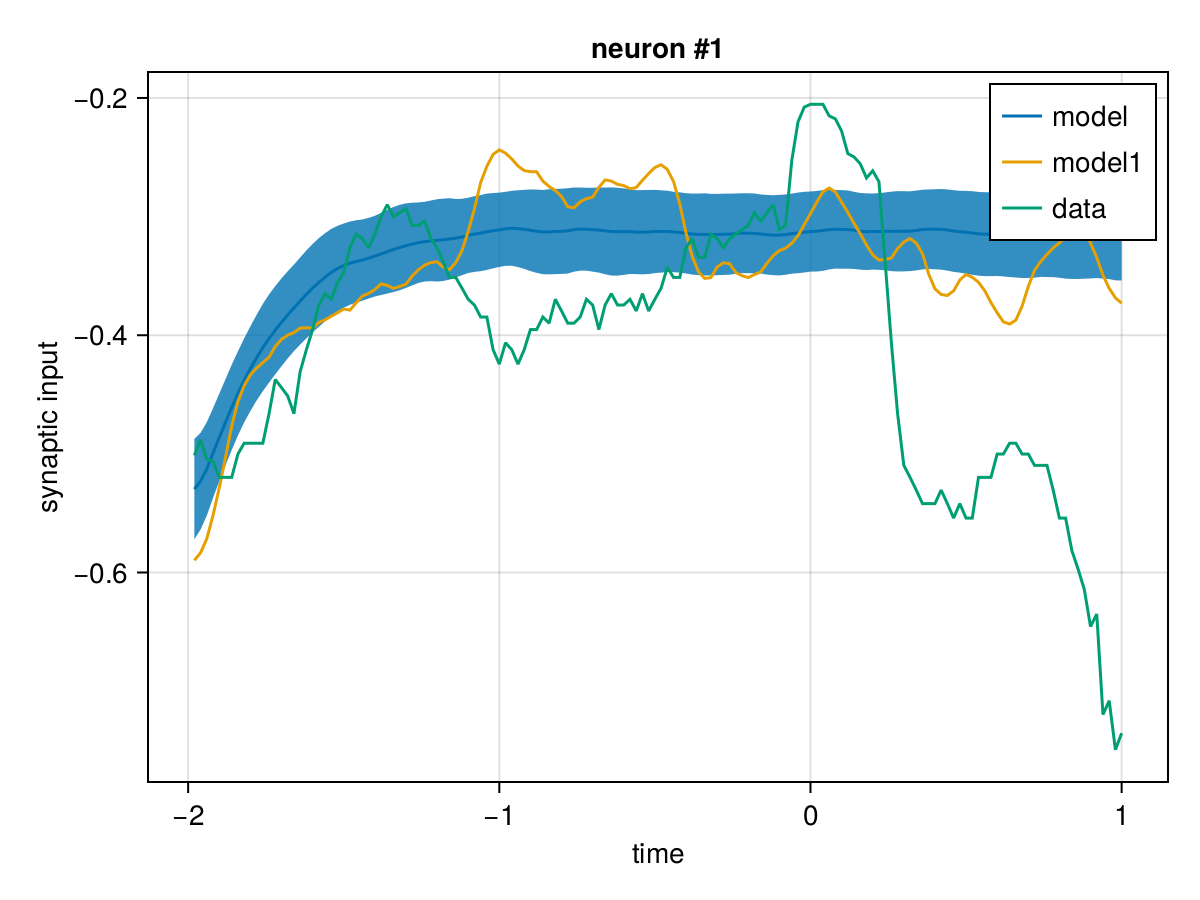

In [28]:
y_model = hcat([x[:,ineuron] for x in ulearned]...)
y_model_ave = dropdims(mean(y_model, dims=2), dims=2)
y_model_bar = dropdims(std(y_model, dims=2), dims=2)
x = (1:length(y_model_ave)) * p.learn_every / 1000 .- 2
fig, ax, _ = band(x, y_model_ave .- y_model_bar, y_model_ave .+ y_model_bar)
lines!(ax, x, y_model_ave, label="model")

y_model1 = ulearned[itrial][:,ineuron]
lines!(ax, x, y_model1, label="model1")

y_data = utarget[:,ineuron,itask]
lines!(ax, x, y_data, label="data")

axislegend()
ax.xlabel = "time"
ax.ylabel = "synaptic input"
ax.title = "neuron #1"
fig

In [29]:
times_neuron1 = vcat([x[ineuron] for x in model["times"][:,itask]]...)  # spike times for one neuron across all trials
psth = fit(Histogram, times_neuron1 * p.dt, p.stim_off : p.learn_every : p.train_time)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1000.0:20.0:4000.0
weights: [1, 1, 2, 0, 1, 1, 2, 1, 3, 3  …  6, 3, 7, 6, 5, 6, 7, 7, 8, 2]
closed: left
isdensity: false

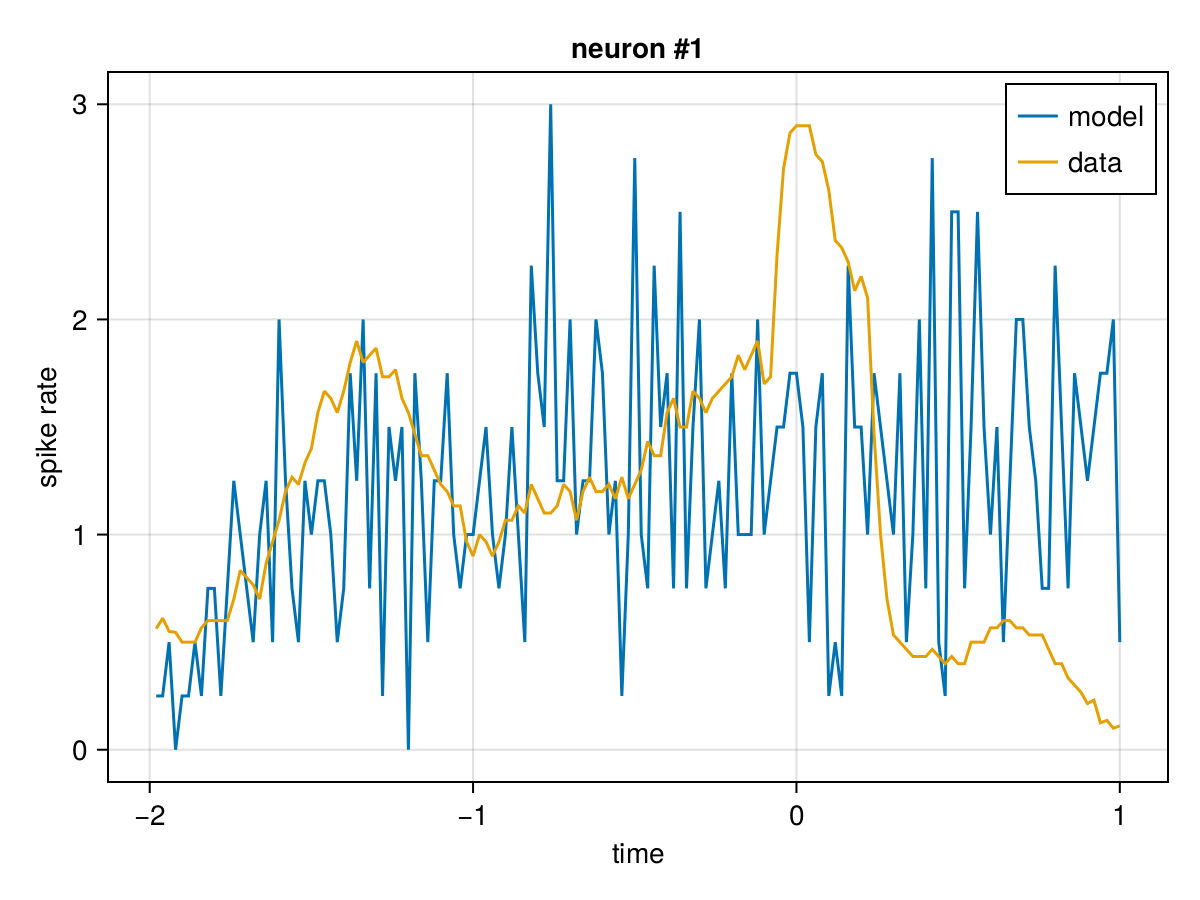

In [30]:
ntrials = size(model["times"], 1)
x = psth.edges[1][2:end] / 1000
y = psth.weights / ntrials / p.learn_every * 1000
fig, ax, _ = lines(x .- 3, y, label="model")

y = @view data[:,ineuron]
lines!(ax, x .- 3, y, label="data")

axislegend()
ax.xlabel = "time"
ax.ylabel = "spike rate"
ax.title = "neuron #1"
fig